In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [43]:
def relu(x):
    x = np.copy(x)
    x[x < 0] = 0
    return x

In [55]:
# input dimension
n = 100

# output dimension
m = 100

# number of points
k = 10000

# inputs
x0 = np.random.randn(n, 1) * 100
X = np.random.randn(n, k) + x0

# weight matrix
W = [np.random.randn(m, n) for _ in range(10)]

# biases
b = np.random.randn(m, 1)

# computing outputs
for w in W:
    X = relu(w @ X + b)

(array([   9.,   88.,  520., 1681., 2840., 2729., 1559.,  474.,   93.,
           7.]),
 array([2.93713634e+10, 2.96428698e+10, 2.99143761e+10, 3.01858824e+10,
        3.04573888e+10, 3.07288951e+10, 3.10004014e+10, 3.12719078e+10,
        3.15434141e+10, 3.18149205e+10, 3.20864268e+10]),
 <a list of 10 Patch objects>)

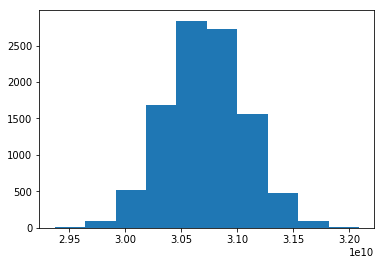

In [56]:
plt.hist(X[1, :])

In [57]:
p = 0.01
for w in W:
    sp = np.linalg.eig(w.T @ w)[0] ** 0.5
    print(np.mean(sp), np.max(sp))

8.461652379496469 19.270151958351942
8.49872781300166 19.27420141638459
8.418829428389165 19.448753720803236
8.449801773687012 20.006623089936433
8.48965239274474 19.327245889204164
8.482621975142996 19.052850176399232
8.439654171361065 19.363814813127284
8.488690153353964 19.931436062333297
8.587671868438255 19.599712365036545
8.406016774161053 19.194673460776908


In [61]:
10**len(W)/1e10

1.0